# Problem Statement :
An online retail store is trying to understand the various customer purchase patterns for their firm, required to give enough evidence based insights to provide the same.

# Dataset Information:
The online_retail.csv contains 541909 rows and 8 columns.

# Feature Name : Description
Invoice : Invoice number
StockCode: Product ID
Description: Product Description
Quantity: Quantity of the product
InvoiceDate: Date of the invoice
Price: Price of the product per unit
CustomerID: Customer ID
Country: Region of Purchase


# Project Objective:
Using the above data, finding useful insights about the customer purchasing history that can be an added advantage for the online retailer. Segment the customers based on their purchasing behavior.

# Exploratary Data Analysis

Pre-processing of the data included the following steps:
Loading the Online_retail dataset.
Inspect for missing data and take necessary action as per the following: a. Remove the rows with missing value if their number is insignificant b. Replace the missing values with the mean or median if the feature is numeric c. Replace the missing values with the mode if the feature is object type But in this case we have 136,534 total missing values are there in the dataset, this dataset has total 541909 records. it's a big dataset if we remove the missing values from the dataset also still we can have enough records of data for build a model, so I am going to drop that missing values from the dataset for future analysis.
Convert the feature InvoiceDate into datetime format.
Identifying Correlation between features.
Box Plotting the data using with matplotlib.pyplot and seaborn for checking outliers.
Creating Revenue feature from Quantity and UnitPrice for checking total.
Identifying which country has more sales.
Identifying top selling products in the country.
Identifying which month, year, day and hour has more sales.
Identifying cancelled transactions and drop them.
Split the InvoiceDate feature into month, day, week and year.
Scale the data.
Using the train_test_split from sklearn.model_selection module, extract the X_train, X_test, y_train, y_test for the various models with data split of 80:20 and random_state=0

# Assumptions:


There is no significant correlation between features in the data. There are outliers in Quantity and Unitprice columns so I removed for future calculations. From country feature I found UnitedKingdom has majority(90%) of sales, so I extracted where country is UnitedKingdom and perform future calculations.

# Choosing the Algorithm for the Project:
This data has no dependent feature, so I did use clustering technique for Segment the customers based on their purchasing behavior with KMeans clustering: k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition on observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. after getting clusters it's a classification problem, so I built LogisticRegression, DecisionTreeClassifier and XGBClassifier for better accuracy, these models are giving better accuracy.

# Conclusion:
Logistic regression, DecisionTree classifier, RandomForestClassifier and XGBoost classifiers gave more than 98% accuracy.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-data/OnlineRetail.csv


# Importing libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset:

In [3]:
df = pd.read_csv(r'/kaggle/input/online-retail-data/OnlineRetail.csv',encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# shape of the data:
df.shape

(541909, 8)

# checking null values in the dataset:¶


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

there are null values presented in Description and CustomerID columns, online_retail is large dataset lets drop the null values for future calculations.

# Dropping null values:

In [6]:
# dropping null values:
df.dropna(inplace=True)

# Information of the data:

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Changing InvoiceDate to datatime:

In [9]:
# InvoiceDate is in object format, changing object to datetime format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Description of the data:

In [11]:
# checking statistical insights
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207168,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


# Dropping duplicates:

In [12]:
# drop duplicates:
df = df.drop_duplicates()


# Removing  negative values from quantity column
df = df[df['Quantity']>0]

# Boxplot:

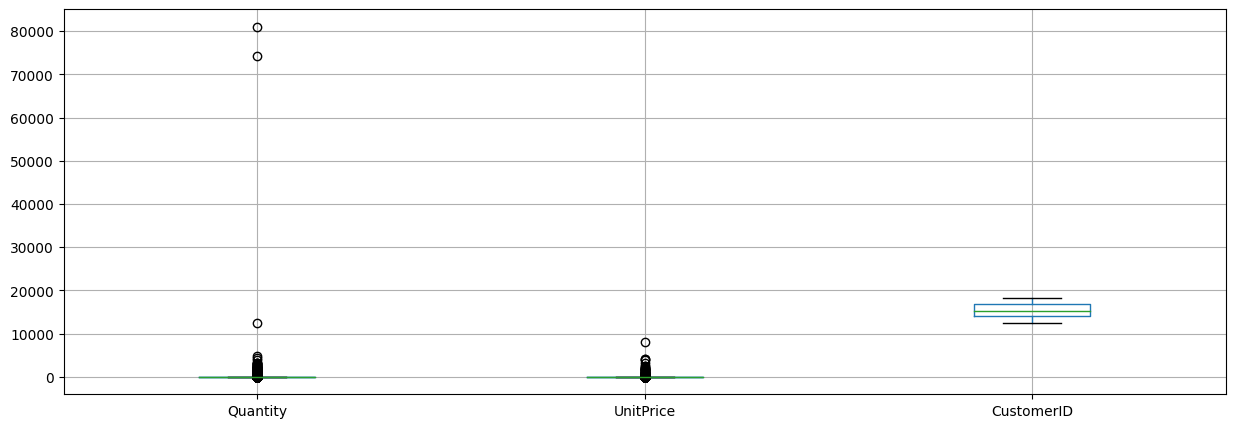

In [13]:
# checking outliers
df.boxplot(figsize=(15,5))
plt.show()

# Removing Outliers:

In [14]:
Q1 = df.Quantity.quantile(0.25)
Q3 = df.Quantity.quantile(0.75)
IQR = Q3-Q1
df = df[(df.Quantity >= Q1-1.5*IQR) & (df.Quantity<=Q3+1.5*IQR)]

In [15]:
Q1 = df.UnitPrice.quantile(0.25)
Q3 = df.UnitPrice.quantile(0.75)
IQR = Q3-Q1
df = df[(df.UnitPrice >= Q1-1.5*IQR) & (df.UnitPrice<=Q3+1.5*IQR)]

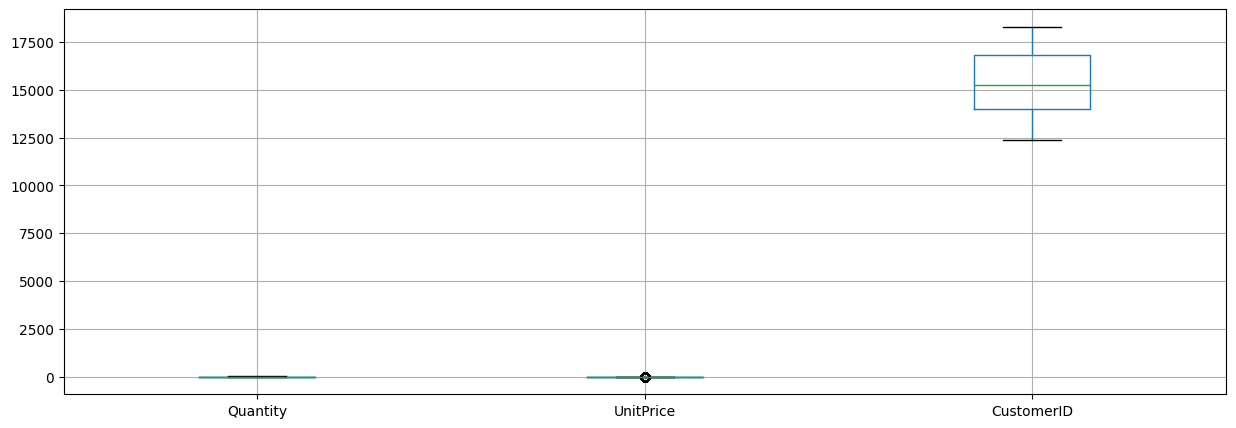

In [16]:
df.boxplot(figsize=(15,5))
plt.show()

# Creating Revenue feature 

In [17]:
# adding revenue column to the dataset 
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Top Countries:

In [18]:
#getting top country: which country has more sales
Top_Country = df['Country'].value_counts().head(10)
Top_Country

Country
United Kingdom    300303
Germany             7450
France              6891
EIRE                5444
Spain               2041
Belgium             1660
Switzerland         1434
Portugal            1252
Norway               773
Netherlands          617
Name: count, dtype: int64

# Top Countries Visualization:

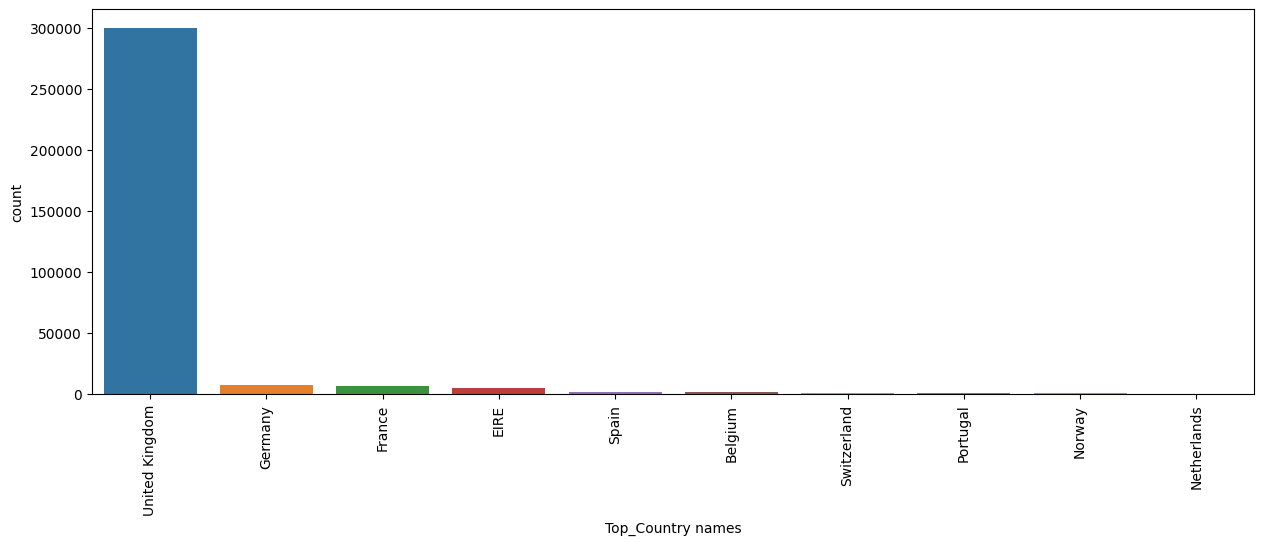

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x=Top_Country.index,y=Top_Country.values)
plt.xlabel('Top_Country names')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()


# Top Selling Products:

In [20]:
# finding top selling products
Top_products = df['Description'].value_counts().head(20)
Top_products

Description
WHITE HANGING HEART T-LIGHT HOLDER    1668
JUMBO BAG RED RETROSPOT               1327
PARTY BUNTING                         1268
LUNCH BAG RED RETROSPOT               1195
ASSORTED COLOUR BIRD ORNAMENT         1146
SET OF 3 CAKE TINS PANTRY DESIGN      1113
LUNCH BAG  BLACK SKULL.               1021
SPOTTY BUNTING                         973
LUNCH BAG SPACEBOY DESIGN              956
PACK OF 72 RETROSPOT CAKE CASES        945
NATURAL SLATE HEART CHALKBOARD         936
LUNCH BAG CARS BLUE                    926
REX CASH+CARRY JUMBO SHOPPER           896
LUNCH BAG PINK POLKADOT                895
HEART OF WICKER SMALL                  886
LUNCH BAG SUKI DESIGN                  867
PAPER CHAIN KIT 50'S CHRISTMAS         866
ALARM CLOCK BAKELIKE RED               860
BAKING SET 9 PIECE RETROSPOT           829
JAM MAKING SET WITH JARS               824
Name: count, dtype: int64

# Top Selling Products Visualization:

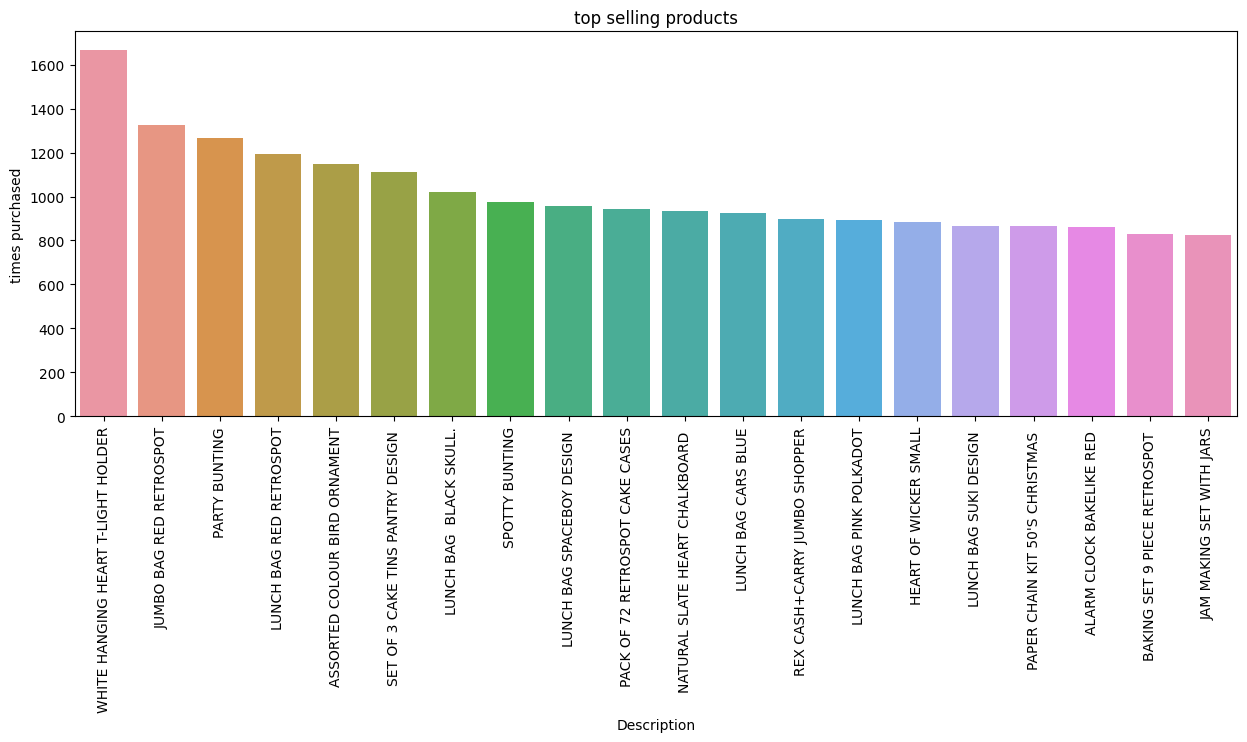

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x=Top_products.index,y=Top_products.values)
plt.title('top selling products')
plt.xlabel('Description')
plt.ylabel('times purchased')
plt.xticks(rotation='vertical')
plt.show()

# Extracting United Kingdom sales Data:

Extracting United Kingdom sales data from the dataset because sales are higher than other countries.

In [22]:
#df.set_index('InvoiceDate',inplace = True)
data = df[df['Country']=='United Kingdom']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Dropping Cancelled Transactions:

In [23]:
# there are cancelled transactions in InvoiceNo column contains 'C',lets Drop cancelled transactions:
indx = data.InvoiceNo[data.InvoiceNo.str.contains('C') == True].index
data.drop(index= indx, inplace= True)

In [24]:
data.reset_index(inplace = True)


In [25]:
data.shape

(300303, 10)

In [26]:
import datetime as dt

data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
data['year'] =data['InvoiceDate'].dt.year

In [27]:
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Day,Hour,year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010


# Extracting Features:

In [28]:
data = pd.DataFrame(data[['CustomerID','Description','Quantity','UnitPrice','Month','Day']])
data

,CustomerID,Description,Quantity,UnitPrice,Month,Day
0,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,12,1
1,17850.0,WHITE METAL LANTERN,6,3.39,12,1
2,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,12,1
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,12,1
4,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,12,1
...,...,...,...,...,...,...
300298,15804.0,ZINC T-LIGHT HOLDER STAR LARGE,12,0.95,12,9
300299,15804.0,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,12,9
300300,13113.0,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,12,9
300301,13113.0,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,12,9


# LabelEncoding:

In [29]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['Description'] = encoder.fit_transform(data['Description'])

In [30]:
data.head()

,CustomerID,Description,Quantity,UnitPrice,Month,Day
0,17850.0,3386,6,2.55,12,1
1,17850.0,3394,6,3.39,12,1
2,17850.0,772,8,2.75,12,1
3,17850.0,1650,6,3.39,12,1
4,17850.0,2534,6,3.39,12,1


# Heatmap:

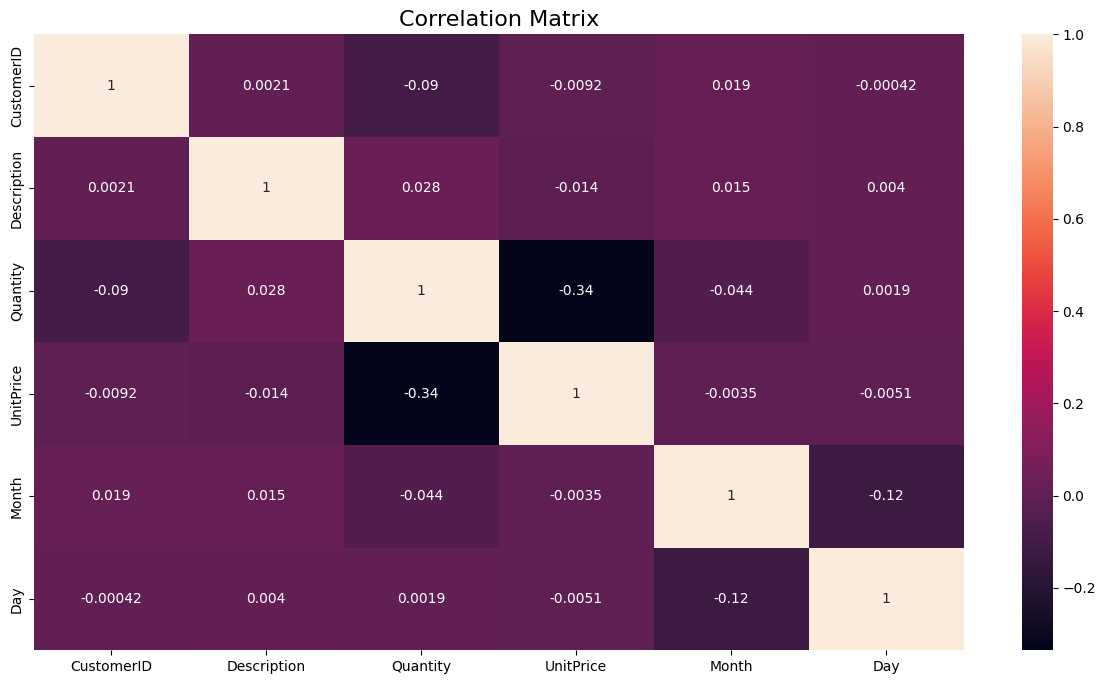

In [31]:
# Correlation between features of dataset
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# Data Scaling:

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [32]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled 

array([[ 1.43654718,  1.55624988, -0.17641212,  0.2325403 ,  1.26649333,
        -1.61783842],
       [ 1.43654718,  1.56432496, -0.17641212,  0.7754766 ,  1.26649333,
        -1.61783842],
       [ 1.43654718, -1.08228295,  0.12263412,  0.36181085,  1.26649333,
        -1.61783842],
       ...,
       [-1.5351198 , -0.180902  ,  0.12263412,  0.4910814 ,  1.26649333,
        -0.69670427],
       [-1.5351198 ,  0.91730907,  2.51500408, -0.60771827,  1.26649333,
        -0.69670427],
       [-1.5351198 , -0.93390333,  0.42168037,  3.16051823,  1.26649333,
        -0.69670427]])

In [33]:
data_scaled = pd.DataFrame(data_scaled, columns = ['CustomerID','Description','Quantity','UnitPrice','Month','Day'])
data_scaled.head()

,CustomerID,Description,Quantity,UnitPrice,Month,Day
0,1.436547,1.556250,-0.176412,0.232540,1.266493,-1.617838
1,1.436547,1.564325,-0.176412,0.775477,1.266493,-1.617838
2,1.436547,-1.082283,0.122634,0.361811,1.266493,-1.617838
3,1.436547,-0.196043,-0.176412,0.775477,1.266493,-1.617838
4,1.436547,0.696254,-0.176412,0.775477,1.266493,-1.617838


# Segment the customers based on their purchasing behavior with KMeans clustering:

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

# Elbow Method:

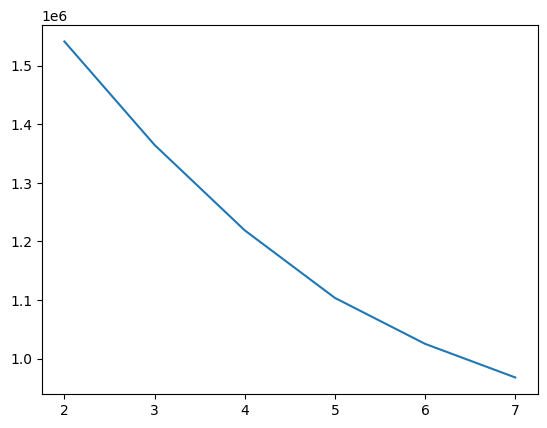

In [34]:
from sklearn.cluster import KMeans
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=60,random_state= 50)
    model_clus.fit(data_scaled)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [35]:
cluster = KMeans(n_clusters=5, max_iter=60, random_state= 15)
cluster.fit(data_scaled)

KMeans(max_iter=60, n_clusters=5, random_state=15)

In [36]:
data_scaled['Cluster_Id']=cluster.labels_
data_scaled[data_scaled['Cluster_Id']==0].sort_values(by=['Month']).head(11)

,CustomerID,Description,Quantity,UnitPrice,Month,Day,Cluster_Id
69903,1.443448,1.210031,0.720727,-1.144191,-1.372852,1.836415,0
69579,1.132292,1.200946,-0.924028,-0.607718,-1.372852,1.836415,0
69603,1.132292,1.450264,-0.176412,-0.607718,-1.372852,1.836415,0
69605,1.132292,1.478527,-0.624981,-0.866259,-1.372852,1.836415,0
69614,1.132292,1.374561,-0.924028,-0.349177,-1.372852,1.836415,0
69763,1.430901,0.743695,-0.924028,-0.866259,-1.372852,1.836415,0
69771,1.430901,1.359420,-0.924028,-1.144191,-1.372852,1.836415,0
69787,1.430901,1.621860,-0.924028,-0.866259,-1.372852,1.836415,0
69791,1.430901,1.268575,-0.325935,-0.349177,-1.372852,1.836415,0
69793,1.430901,1.251416,-0.924028,-0.607718,-1.372852,1.836415,0


In [37]:
data_scaled[data_scaled['Cluster_Id']==1].sort_values(by=['Month']).head(11)

,CustomerID,Description,Quantity,UnitPrice,Month,Day,Cluster_Id
25499,1.131664,1.005126,1.916912,-0.866259,-1.959373,-0.351279,1
21316,-0.164402,0.683132,2.664527,-1.144191,-1.959373,-1.157271,1
21317,-0.164402,1.214068,2.664527,-1.144191,-1.959373,-1.157271,1
21318,-0.164402,1.302894,2.664527,-1.144191,-1.959373,-1.157271,1
21335,1.672424,-0.344422,2.515004,-0.866259,-1.959373,-1.042130,1
21336,1.672424,-0.004260,1.916912,-1.144191,-1.959373,-1.042130,1
21337,1.672424,-0.011325,1.916912,-1.144191,-1.959373,-1.042130,1
21354,-1.545157,-1.383080,2.664527,-1.144191,-1.959373,-1.042130,1
21357,-1.545157,-0.853153,2.515004,-1.144191,-1.959373,-1.042130,1
21315,-0.164402,1.659207,2.664527,-1.144191,-1.959373,-1.157271,1


In [38]:
data_scaled[data_scaled['Cluster_Id']==2].sort_values(by=['Month']).head(11)

,CustomerID,Description,Quantity,UnitPrice,Month,Day,Cluster_Id
88828,1.604672,-0.217240,-0.924028,-0.995530,-0.786331,-1.272413,2
88087,1.430901,1.057614,-0.325935,-0.058318,-0.786331,-1.387555,2
88090,1.430901,-0.224306,-0.924028,-0.071245,-0.786331,-1.387555,2
88091,1.430901,-0.079963,-0.924028,-0.349177,-0.786331,-1.387555,2
88093,1.430901,1.334185,-0.774505,-0.058318,-0.786331,-1.387555,2
88094,1.430901,1.333176,-0.774505,-0.058318,-0.786331,-1.387555,2
88095,1.430901,-0.233390,-0.624981,-0.071245,-0.786331,-1.387555,2
88097,1.430901,0.697263,-0.176412,-0.607718,-0.786331,-1.387555,2
88098,1.430901,1.170665,-0.924028,-0.866259,-0.786331,-1.387555,2
88099,1.430901,1.171674,-0.924028,-0.866259,-0.786331,-1.387555,2


In [39]:
data_scaled[data_scaled['Cluster_Id']==3].sort_values(by=['Month']).head(11)

,CustomerID,Description,Quantity,UnitPrice,Month,Day,Cluster_Id
19988,-1.409654,-0.238437,0.421680,-0.155271,-1.959373,-1.272413,3
30153,1.286615,-1.310404,0.720727,-1.144191,-1.959373,0.915280,3
30156,1.286615,-1.682867,-0.924028,0.491081,-1.959373,0.915280,3
30157,1.286615,1.450264,-0.774505,-0.607718,-1.959373,0.915280,3
30158,1.286615,0.765901,0.720727,-1.144191,-1.959373,0.915280,3
30159,1.286615,1.303904,0.720727,-1.144191,-1.959373,0.915280,3
30160,1.286615,-1.682867,-0.774505,0.491081,-1.959373,0.915280,3
30162,1.286615,0.676066,-0.924028,0.232540,-1.959373,0.915280,3
30163,1.286615,-1.481999,-0.176412,-1.144191,-1.959373,0.915280,3
30164,-1.461722,1.155524,-0.924028,-0.866259,-1.959373,0.915280,3


In [40]:
data_scaled[data_scaled['Cluster_Id']==4].sort_values(by=['Month']).head(11)


,CustomerID,Description,Quantity,UnitPrice,Month,Day,Cluster_Id
27103,-0.366402,0.913272,-0.924028,1.783787,-1.959373,0.224430,4
24104,1.158012,-0.185949,-0.026889,1.783787,-1.959373,-0.581562,4
24106,1.158012,1.256462,-0.774505,1.783787,-1.959373,-0.581562,4
24120,-0.313079,-0.935922,1.916912,2.947222,-1.959373,-0.581562,4
24121,-0.313079,-0.946016,0.421680,2.947222,-1.959373,-0.581562,4
24130,-1.124845,-0.873340,0.720727,2.430140,-1.959373,-0.581562,4
24131,-1.124845,0.681113,0.720727,2.430140,-1.959373,-0.581562,4
24132,-1.124845,-1.507234,0.720727,2.430140,-1.959373,-0.581562,4
24138,-0.323744,-1.003551,-0.774505,2.430140,-1.959373,-0.581562,4
24141,-0.323744,-0.345432,-0.176412,2.430140,-1.959373,-0.581562,4


In [41]:
data_scaled['Cluster_Id'].value_counts()


Cluster_Id
2    78779
3    73665
0    68014
4    49415
1    30430
Name: count, dtype: int64

after KMeans clustering, build LogisticRegression, DecisionTreeClassifier and XGBClassifier for better accuracy, these models are giving better accuracy.

# Model Building:
Declaring independent and dependent variables as x and y.

In [42]:
x = data_scaled.loc[:,['CustomerID','Description','Quantity','UnitPrice','Month','Day']]
y = data_scaled.loc[:,['Cluster_Id']]

# Splitting Data:

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8,random_state=123)

# LogisticRegression:

This is a classification problem so importing LogisticRegression from sklearn.linear_model package for building a Logisticregression model.

In [44]:
# Importing LogisticRegression:
from sklearn.linear_model import LogisticRegression

In [45]:
logistic = LogisticRegression().fit(x_train, y_train)
pred = logistic.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(pred,y_test))
lr_acc = accuracy_score(pred,y_test)
print(lr_acc)

[[13647     4     4     0     0]
 [    4  6100     2     1     1]
 [   11     3 15708     4     2]
 [    9     4     8 14709     0]
 [    7     1     5     2  9825]]
0.9988012187609264


In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13678
           1       1.00      1.00      1.00      6112
           2       1.00      1.00      1.00     15727
           3       1.00      1.00      1.00     14716
           4       1.00      1.00      1.00      9828

    accuracy                           1.00     60061
   macro avg       1.00      1.00      1.00     60061
weighted avg       1.00      1.00      1.00     60061



# DecisionTreeClassifier:

In [48]:
# Importing DecisionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier().fit(x_train,y_train)
predicted=dt.predict(x_test)
predicted

array([1, 0, 1, ..., 2, 3, 0], dtype=int32)

# Model Evaluation:

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(predicted,y_test)

array([[13550,    18,     9,    53,    49],
       [   14,  6061,    16,    13,     1],
       [   17,    25, 15606,    45,    69],
       [   44,     6,    43, 14593,     5],
       [   53,     2,    53,    12,  9704]])

In [51]:
dt_acc = accuracy_score(predicted,y_test)
dt_acc

0.9908925925309269

# classification_report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13678
           1       0.99      0.99      0.99      6112
           2       0.99      0.99      0.99     15727
           3       0.99      0.99      0.99     14716
           4       0.99      0.99      0.99      9828

    accuracy                           0.99     60061
   macro avg       0.99      0.99      0.99     60061
weighted avg       0.99      0.99      0.99     60061



# RandomForestClassifier:

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
cr_rf = classification_report(pred_rf, y_test)
rf_acc=accuracy_score(pred_rf,y_test)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13654
           1       1.00      1.00      1.00      6109
           2       1.00      0.99      0.99     15749
           3       0.99      1.00      1.00     14705
           4       0.99      0.99      0.99      9844

    accuracy                           0.99     60061
   macro avg       0.99      0.99      0.99     60061
weighted avg       0.99      0.99      0.99     60061



# XGBClassifier:

In [54]:
# Importing and performing XGBClassifier:
from xgboost import XGBClassifier

In [55]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
xgbr_acc = accuracy_score(y_test, predictions)
xgbr_acc 

0.9964036562827792

# Comparing Models:

In [56]:
compare = {'model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier'],
           'Accuracy':[lr_acc,dt_acc,rf_acc,xgbr_acc]}
compare_df = pd.DataFrame(compare)
compare_df

,model,Accuracy
0,LogisticRegression,0.998801
1,DecisionTreeClassifier,0.990893
2,RandomForestClassifier,0.994089
3,XGBClassifier,0.996404


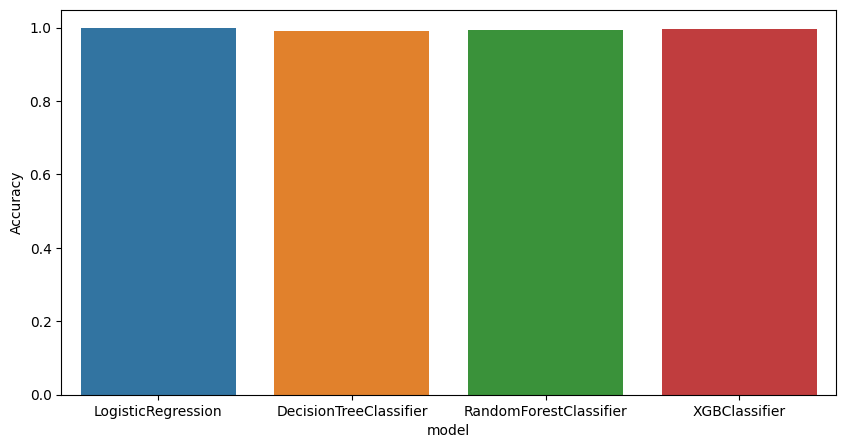

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='model',y='Accuracy',data=compare_df)
plt.show()

# Inferences:

Now we can easily compare models and choose best one.